In [1]:
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 2500)

In [2]:
data = pd.read_csv("Fahrplan", sep = "\t", encoding='latin-1')

#Bei Ausfall wird Row gelöscht, bei Nan mit Mean der Column aufgefüllt
for column in list(data):
    if ("Delay" in column):
        data = data[data[column] != "fällt aus"]
        data = data[data[column] != "fÃ¤llt aus"]
        data = data[data[column] != "f?ñllt aus"]
        data = data[data[column] != "f?â?ñllt aus"]
        data[column] = pd.to_numeric(data[column])
        data[column].fillna(data[column].mean(), inplace = True)  

DelaySedanstrasse: 0.8235849056603773
DelayLeimbach: 0.5226415094339623
DelayLandwehrplatz: 0.5382075471698113
DelayAlterMarkt: 0.7514150943396226
DelayBarmenBahnhof: 0.6334905660377359
DelayZeughausstrasse: 0.37641509433962267
DelayImSpringen: 0.3712264150943396
DelayMeckelstrasse: 0.38160377358490566
DelayFriedhofUnterbarmen: 0.41179245283018867
DelayChristbusch: 0.42735849056603775
DelayHesselnberg: 0.425
DelayBendahlerstrasse: 0.39811320754716983
DelayWolkenburg: 0.3622641509433962
DelayHaubahn: 0.31933962264150945
DelayHauptbahnhof: 0.7613207547169811
DelayKarlsplatz: 0.7438679245283019
DelayHoechsten: 0.65
DelayMarienstrasse: 0.5613207547169812
DelayFriedhofskirche: 0.49858490566037733
DelayBethesdaKrankenhaus: 0.5245283018867924
DelayBremerstrasse: 0.565566037735849
DelayRostockerstrasse: 0.5976415094339622
DelayGreifswalderstrasse: 0.6193396226415094
DelayStralsunderstrasse: 0.6306603773584906
DelayHansastrasse: 0.6405660377358491


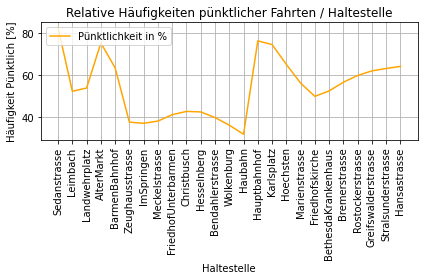

In [3]:
RelativePunktlichkeit = []
Haltestelle = []
for column in list(data):
    if ("Delay" in column):
        print(column + ": " + str((data[column].value_counts(1)).to_dict()[0]))
        RelativePunktlichkeit.append((data[column].value_counts(1)).to_dict()[0] * (100))
        Haltestelle.append(column.replace("Delay", ""))
plt.plot(Haltestelle, RelativePunktlichkeit, color = "orange", label = "Pünktlichkeit in %")
plt.xticks(rotation = "vertical")
plt.grid()
plt.legend(loc = "upper left")
plt.xlabel("Haltestelle")
plt.ylabel("Häufigkeit Pünktlich [%]")
plt.title("Relative Häufigkeiten pünktlicher Fahrten / Haltestelle")
plt.tight_layout()
# plt.savefig("Relative Häufigkeiten pünktlicher Fahrten", dpi = 200)